**Ejercicio N°1:**

Escribir una función que devuelva un Hexágono.

In [282]:
!pip3 install ColabTurtle #Instalamos Libreria Turtle
from ColabTurtle.Turtle import *


In [283]:
import ColabTurtle.Turtle as tim #Importamos Libreria Turtle

def Turtle(): #Creamos el ambiente
  initializeTurtle() 
  penup() #Nos escriba cuando se traslade
  goto(290, 20) #Trasladamos el cursor
  pendown() #Para que dibuje la figura
  tim.right(90) #el cursor inicie de manera horizontal 
  
def FigGeo(num_lados): #Creamos una funcion para determinar el numero de lados de nuestra figura
    
    for _ in range(num_lados):
      angle = 360/num_lados #Obtenemos los grados de rotacion del cursor
      tim.forward(200) #Determinamos el tamaño de nuestras lineas
      tim.right(angle) # Indicamos los grados de rotacion
    

In [289]:
Turtle()
FigGeo(4) #Ponemos 6 como variable para obtener un Hexagono

**Ejercicio 2**

Generar un Notebook Colab con código y resultados, con el
siguiente fichero autos.csv que contiene información de autos de
un periodo de tiempo. Resolver los siguientes:

In [290]:
import pandas as pd # Importamos las librerias
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files # Importamos nuestro documento csv
files.upload()

In [291]:
df_autos = pd.read_csv("autos.csv", sep = ";") #Asignamos nuestro documento a un Data Frame
df_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0
...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0


- Limpieza y tratamiento de las variables

In [297]:
print (df_autos.dtypes) #Obtenemos los tipos de las variables

Millas_Por_Galon     float64
Cilindros              int64
Pais_Origen           object
Peso_En_Libras         int64
Desplazamiento       float64
Aceleracion          float64
Nombre                object
Anyo                  object
Caballo_De_Fuerza    float64
dtype: object


In [298]:
df_autos.isnull().sum() #Verificamos si hay #NA y en donde


Millas_Por_Galon     8
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    6
dtype: int64

In [299]:
df_autos["Millas_Por_Galon"] = df_autos.groupby("Cilindros")["Millas_Por_Galon"].transform(lambda x: x.fillna(x.mean())) #Sustituimos valores nulos por la media del segmento de cilindros
df_autos["Caballo_De_Fuerza"] = df_autos.groupby("Cilindros")["Caballo_De_Fuerza"].transform(lambda x: x.fillna(x.mean())) #Sustituimos valores nulos por la media del segmento de cilindros
df_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0
...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0


Generar 6 nuevas variables aplicando los siguientes criterios
con las variables numéricas:

Log10(var1/var2)

Sqrt(var1)exp(var2)/200

Si var 1 > var 2 → 5, caso contrario 3

1/logn(var1/var2)*100

var2**2/var1

In [300]:
df_autos["Peso Potencia"] = np.log10(df_autos["Peso_En_Libras"]) / np.log10(df_autos["Caballo_De_Fuerza"]) #Agregamos variable 1
df_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Peso Potencia
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.676755
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.608751
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.624956
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.624782
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.648407
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,1.781136
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.939611
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.746515
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,1.801792


In [301]:
df_autos["Caballos por cilindrada"] = np.sqrt(df_autos["Caballo_De_Fuerza"]) * np.exp(df_autos["Cilindros"]) /200 #Agregamos variable 2
df_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Peso Potencia,Caballos por cilindrada
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.676755,169.940752
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.608751,191.455493
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.624956,182.545650
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.624782,182.545650
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.648407,176.355853
...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,1.781136,2.531612
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.939611,1.968564
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.746515,2.502002
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,1.801792,2.426395


In [302]:
df_autos["Consumo Aceleracion"] = np.where(df_autos["Aceleracion"]>df_autos["Millas_Por_Galon"],5,3) #Agregamos variable 3
df_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Peso Potencia,Caballos por cilindrada,Consumo Aceleracion
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.676755,169.940752,3
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.608751,191.455493,3
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.624956,182.545650,3
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.624782,182.545650,3
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.648407,176.355853,3
...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,1.781136,2.531612,3
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.939611,1.968564,3
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.746515,2.502002,3
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,1.801792,2.426395,3


In [303]:
df_autos["Desplazamiento Potencia"] = 1 / (np.log(df_autos["Desplazamiento"]) - np.log(df_autos["Caballo_De_Fuerza"]))*100 #Agregamos variable 4
df_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Peso Potencia,Caballos por cilindrada,Consumo Aceleracion,Desplazamiento Potencia
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.676755,169.940752,3,116.371992
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.608751,191.455493,3,132.980902
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.624956,182.545650,3,133.082059
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.624782,182.545650,3,141.564376
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.648407,176.355853,3,130.075447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,1.781136,2.531612,3,205.214447
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.939611,1.968564,3,160.393346
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.746515,2.502002,3,210.766821
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,1.801792,2.426395,3,239.209333


In [304]:
df_autos["Peso Potencia 2"] = (df_autos["Peso_En_Libras"])*2 / (df_autos["Caballo_De_Fuerza"]) #Agregamos variable 5
df_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Peso Potencia,Caballos por cilindrada,Consumo Aceleracion,Desplazamiento Potencia,Peso Potencia 2
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.676755,169.940752,3,116.371992,53.907692
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.608751,191.455493,3,132.980902,44.763636
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.624956,182.545650,3,133.082059,45.813333
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.624782,182.545650,3,141.564376,45.773333
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.648407,176.355853,3,130.075447,49.271429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,1.781136,2.531612,3,205.214447,64.883721
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.939611,1.968564,3,160.393346,81.923077
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.746515,2.502002,3,210.766821,54.642857
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,1.801792,2.426395,3,239.209333,66.455696


In [305]:
df_autos["Potencia Aceleracion"] = 1 / (np.log(df_autos["Caballo_De_Fuerza"]) - np.log(df_autos["Aceleracion"]))*100 #Agregamos variable 6
df_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Peso Potencia,Caballos por cilindrada,Consumo Aceleracion,Desplazamiento Potencia,Peso Potencia 2,Potencia Aceleracion
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.676755,169.940752,3,116.371992,53.907692,41.970466
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.608751,191.455493,3,132.980902,44.763636,37.543197
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.624956,182.545650,3,133.082059,45.813333,38.273996
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.624782,182.545650,3,141.564376,45.773333,39.592535
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.648407,176.355853,3,130.075447,49.271429,38.606056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,1.781136,2.531612,3,205.214447,64.883721,58.579687
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.939611,1.968564,3,160.393346,81.923077,133.601021
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.746515,2.502002,3,210.766821,54.642857,50.509854
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,1.801792,2.426395,3,239.209333,66.455696,69.142605


Generar 3 variables cualitativas ordinales con los siguientes
criterios:

Si es mayor a la “media + 1*desviación estándar” →
Alto

Si está entre “media - 1*desviación estándar” y
“media + 1*desviación estándar” → Medio

Si es menor a la “media - 1*desviación estándar” →
Bajo

In [306]:
df_autos["Clas Caballos de Fuerza"] = np.where(df_autos["Caballo_De_Fuerza"] > np.mean(df_autos["Caballo_De_Fuerza"]) + np.std( df_autos["Caballo_De_Fuerza"]), 'high', 
         (np.where(df_autos["Caballo_De_Fuerza"] < np.mean(df_autos["Caballo_De_Fuerza"]) - np.std( df_autos["Caballo_De_Fuerza"]), 'low', 'medium'))) #Agregamos variable 1
df_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Peso Potencia,Caballos por cilindrada,Consumo Aceleracion,Desplazamiento Potencia,Peso Potencia 2,Potencia Aceleracion,Clas Caballos de Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.676755,169.940752,3,116.371992,53.907692,41.970466,medium
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.608751,191.455493,3,132.980902,44.763636,37.543197,high
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.624956,182.545650,3,133.082059,45.813333,38.273996,high
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.624782,182.545650,3,141.564376,45.773333,39.592535,high
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.648407,176.355853,3,130.075447,49.271429,38.606056,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,1.781136,2.531612,3,205.214447,64.883721,58.579687,medium
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.939611,1.968564,3,160.393346,81.923077,133.601021,low
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.746515,2.502002,3,210.766821,54.642857,50.509854,medium
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,1.801792,2.426395,3,239.209333,66.455696,69.142605,medium


In [307]:
df_autos["Clas Consumo"] = np.where(df_autos["Millas_Por_Galon"] > np.mean(df_autos["Millas_Por_Galon"]) + np.std( df_autos["Millas_Por_Galon"]), 'high', 
         (np.where(df_autos["Millas_Por_Galon"] < np.mean(df_autos["Millas_Por_Galon"]) - np.std( df_autos["Millas_Por_Galon"]), 'low', 'medium'))) #Agregamos variable 2
df_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Peso Potencia,Caballos por cilindrada,Consumo Aceleracion,Desplazamiento Potencia,Peso Potencia 2,Potencia Aceleracion,Clas Caballos de Fuerza,Clas Consumo
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.676755,169.940752,3,116.371992,53.907692,41.970466,medium,medium
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.608751,191.455493,3,132.980902,44.763636,37.543197,high,low
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.624956,182.545650,3,133.082059,45.813333,38.273996,high,medium
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.624782,182.545650,3,141.564376,45.773333,39.592535,high,medium
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.648407,176.355853,3,130.075447,49.271429,38.606056,medium,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,1.781136,2.531612,3,205.214447,64.883721,58.579687,medium,medium
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.939611,1.968564,3,160.393346,81.923077,133.601021,low,high
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.746515,2.502002,3,210.766821,54.642857,50.509854,medium,high
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,1.801792,2.426395,3,239.209333,66.455696,69.142605,medium,medium


In [308]:
df_autos["Clas Aceleracion"] = np.where(df_autos["Aceleracion"] > np.mean(df_autos["Aceleracion"]) + np.std( df_autos["Aceleracion"]), 'high', 
         (np.where(df_autos["Aceleracion"] < np.mean(df_autos["Aceleracion"]) - np.std( df_autos["Aceleracion"]), 'low', 'medium'))) #Agregamos variable 3
df_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Peso Potencia,Caballos por cilindrada,Consumo Aceleracion,Desplazamiento Potencia,Peso Potencia 2,Potencia Aceleracion,Clas Caballos de Fuerza,Clas Consumo,Clas Aceleracion
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.676755,169.940752,3,116.371992,53.907692,41.970466,medium,medium,low
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.608751,191.455493,3,132.980902,44.763636,37.543197,high,low,low
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.624956,182.545650,3,133.082059,45.813333,38.273996,high,medium,low
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.624782,182.545650,3,141.564376,45.773333,39.592535,high,medium,low
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.648407,176.355853,3,130.075447,49.271429,38.606056,medium,medium,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,1.781136,2.531612,3,205.214447,64.883721,58.579687,medium,medium,medium
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.939611,1.968564,3,160.393346,81.923077,133.601021,low,high,high
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.746515,2.502002,3,210.766821,54.642857,50.509854,medium,high,low
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,1.801792,2.426395,3,239.209333,66.455696,69.142605,medium,medium,high


Crear una función que muestre los siguientes gráficos para
las variables numéricas según una variable numérica:

Cajas y bigotes

Barras de la media

Histograma con Curva

In [313]:
 def multiples_graficas(Variable): #Creamos la funcion
   data = df_autos[Variable] #Seleccionamos nuestra data
   fig, ax = plt.subplots(1, 3, figsize=(15,5)) 
   ax[0].boxplot(data)  #Creamos nuestros graficos
   ax[1].hist(data) 
   ax[2].plot(data)
   ax[0].title.set_text('Cajas y Bigotes') #Asignamos el nombre a los graficos
   ax[1].title.set_text('Histograma')
   ax[2].title.set_text("Barras")
   plt.show() 

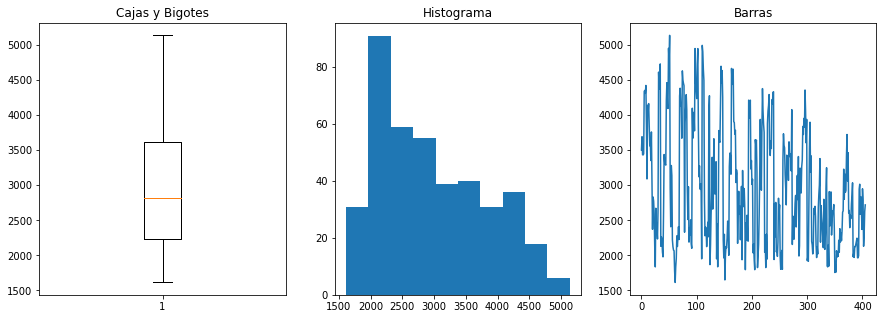

In [314]:
multiples_graficas("Peso_En_Libras")

Crear una función que devuelva un mapa de calor con la
correlación de todas las variables numéricas (incluye las
generadas), para cada país.

In [295]:
#Creamos Combo para eleccion de pais
Pais = "USA" #@param ["Japan", "USA", "Europe"]

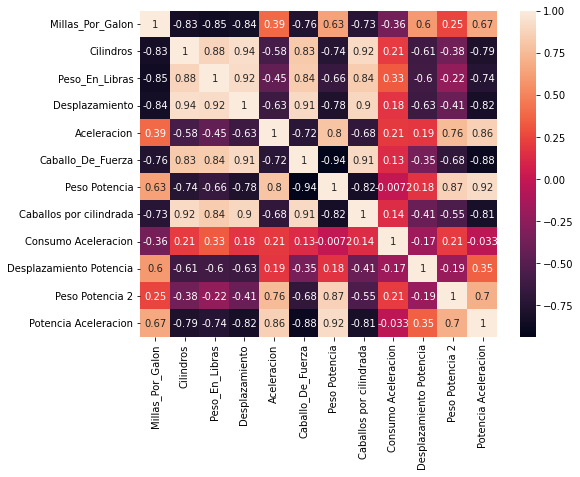

In [315]:
 df_autos_pais = df_autos[df_autos["Pais_Origen"] == Pais] #Filtramos nuestros datos por el Pais elegido
plt.figure(figsize=(8,6)) #Seleccionamos tamaño del grafico
correlacion = df_autos_pais.corr()
sns.heatmap(correlacion, #Elegimos el mapa de calor
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            annot = True
            );